# College Scorecard Analysis

   The aim of this project is to explore data on colleges within the United States including their students' completion rates, debt and repayment rates, salaries, job placement after graduation, and more. The data used here is curtesy of the United States Departent of Education (DOE) and consists of data from 2006 through 2016 for all degree types and certificate-granting institutions of higher education in the U.S. The data used for this analysis can be found [here](https://collegescorecard.ed.gov/data/).

   Job placement, after graduating from higher education, has been an ongoing concern for many students in America. We constently hear of students struggling with the inability to find a job after graduation from college while ,simultaneously, dealing with the burden of financial debt accured from tuition and other education-related fees paid for with student loans. This makes me question what degrees are these students graduating with? what degree category of students is having the least and most difficulty find a job? what degrees tend to procure the most debt and which students are making the most money after graduation? It is with this line of inquery that we will explore the college scorecard dataset and focus on investigating several main characteristics of interest:
   
1. Average unemployment rate, earnings, and debt by state. 
2. Average proportion of degrees awarded by subject and year.
3. Average unemployment rate, earnings, and debt by degree type.

Click [here](#Visualization-&-Analysis) to jump ahead to the final graphs and visualizations of the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from inflation_data import *
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_context("poster")
sns.set(style="darkgrid")

In [2]:
files = [
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv']

In [3]:
# Let's make a list of the columns we want to keep from each dataset, as oppose to keeping all 1,847 of them, and read
# them into a list.

fields = [
'UNITID','INSTNM','CITY','STABBR','ZIP','UGDS_MEN','UGDS_WOMEN','PREDDEG','HIGHDEG','CONTROL',
'REGION','ADM_RATE','SAT_AVG','ACTCMMID','PCIP01','PCIP03','PCIP04','PCIP05','PCIP09',
'PCIP10','PCIP11','PCIP12','PCIP13','PCIP14','PCIP15','PCIP16','PCIP19','PCIP22','PCIP23',
'PCIP24','PCIP25','PCIP26','PCIP27','PCIP29','PCIP30','PCIP31','PCIP38','PCIP39','PCIP40',
'PCIP41','PCIP42','PCIP43','PCIP44','PCIP45','PCIP46','PCIP47','PCIP48','PCIP49','PCIP50',
'PCIP51','PCIP52','PCIP54',
'NPT4_PUB','NPT4_PRIV','COSTT4_A','COSTT4_P','TUITIONFEE_IN','TUITIONFEE_OUT','C150_4','C150_L4',
'COMPL_RPY_1YR_RT','COMPL_RPY_3YR_RT','COMPL_RPY_5YR_RT','COMPL_RPY_7YR_RT',
'GRAD_DEBT_MDN','COUNT_NWNE_P10','COUNT_WNE_P10','MN_EARN_WNE_P10','MD_EARN_WNE_P10','COUNT_NWNE_P6',
'COUNT_WNE_P6','MN_EARN_WNE_P6','MD_EARN_WNE_P6'
]

data = {}
for f in files:
    d = pd.read_csv(f, usecols=fields)
    data[('schools_' + f[6:10])] = d

In [4]:
# Taking a quick look at a dataframe. 

data['schools_2006'].head()

,UNITID,INSTNM,CITY,STABBR,ZIP,PREDDEG,HIGHDEG,CONTROL,REGION,ADM_RATE,ACTCMMID,SAT_AVG,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,NPT4_PUB,NPT4_PRIV,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,C150_4,C150_L4,COMPL_RPY_1YR_RT,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,COMPL_RPY_7YR_RT,GRAD_DEBT_MDN,COUNT_NWNE_P10,COUNT_WNE_P10,MN_EARN_WNE_P10,MD_EARN_WNE_P10,COUNT_NWNE_P6,COUNT_WNE_P6,MN_EARN_WNE_P6,MD_EARN_WNE_P6,UGDS_MEN,UGDS_WOMEN
0,100654,Alabama A & M University,Normal,AL,35762,3,4,1,5,0.4118,18.0,870.0,0.0415,0.01,0.0183,0.0000,0.0000,0.0415,0.0598,0.0,0.1777,0.0814,0.0332,0.0000,0.0449,0.0,0.0083,0.0000,0.0,0.0814,0.0100,0.0,0.0000,0.0000,0.0000,0.0000,0.0017,0.0,0.0631,0.0000,0.0631,0.0432,0.0,0.0,0.0,0.0,0.0050,0.0000,0.2159,0.0000,NaN,NaN,NaN,NaN,3640.0,6760.0,0.3353,NaN,NaN,NaN,NaN,NaN,19750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4724,0.5276
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,3,4,1,5,0.8778,24.0,1095.0,0.0000,0.00,0.0000,0.0034,0.0516,0.0000,0.0187,0.0,0.0601,0.0431,0.0000,0.0062,0.0000,0.0,0.0278,0.0011,0.0,0.0612,0.0062,0.0,0.0006,0.0000,0.0079,0.0000,0.0198,0.0,0.0669,0.0539,0.0283,0.0476,0.0,0.0,0.0,0.0,0.0380,0.2296,0.1927,0.0351,NaN,NaN,NaN,NaN,4792.0,10732.0,0.3582,NaN,NaN,NaN,NaN,NaN,12250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3914,0.6086
2,100690,Amridge University,Montgomery,AL,36117-3553,3,4,2,5,NaN,NaN,NaN,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.6066,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.3934,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,6000.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,11707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4617,0.5383
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,3,4,1,5,0.8834,24.0,1109.0,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0380,0.0,0.0282,0.2377,0.0000,0.0233,0.0000,0.0,0.0502,0.0000,0.0,0.0417,0.0147,0.0,0.0000,0.0000,0.0074,0.0000,0.0233,0.0,0.0233,0.0000,0.0000,0.0343,0.0,0.0,0.0,0.0,0.0564,0.1471,0.2635,0.0110,NaN,NaN,NaN,NaN,4848.0,10224.0,0.4425,NaN,NaN,NaN,NaN,NaN,14500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5099,0.4901
4,100724,Alabama State University,Montgomery,AL,36104-0271,3,4,1,5,0.6698,16.0,785.0,0.0000,0.00,0.0000,0.0000,0.0562,0.0000,0.1248,0.0,0.2531,0.0000,0.0000,0.0018,0.0000,0.0,0.0105,0.0000,0.0,0.0510,0.0105,0.0,0.0000,0.0176,0.0000,0.0000,0.0000,0.0,0.0861,0.0756,0.0861,0.0193,0.0,0.0,0.0,0.0,0.0475,0.0492,0.1019,0.0088,NaN,NaN,NaN,NaN,4008.0,8016.0,0.2880,NaN,NaN,NaN,NaN,NaN,19723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4084,0.5916


In [5]:
#Do all of the dataframes have the same dimensions?...Nope. Same number of features but different number of schools

for df in data:
    print(data[df].shape)

(6848, 73)
(6890, 73)
(6975, 73)
(7149, 73)
(7414, 73)
(7675, 73)
(7793, 73)
(7804, 73)
(7703, 73)
(7593, 73)
(7175, 73)


## Processing and Exploring the Data

In [6]:
# Let's add a 'Year' column to each dataframe.

for df in data:
    data[df]['Year'] = pd.to_numeric(df[8:13])

Text(0.5,1,'schools_2008')

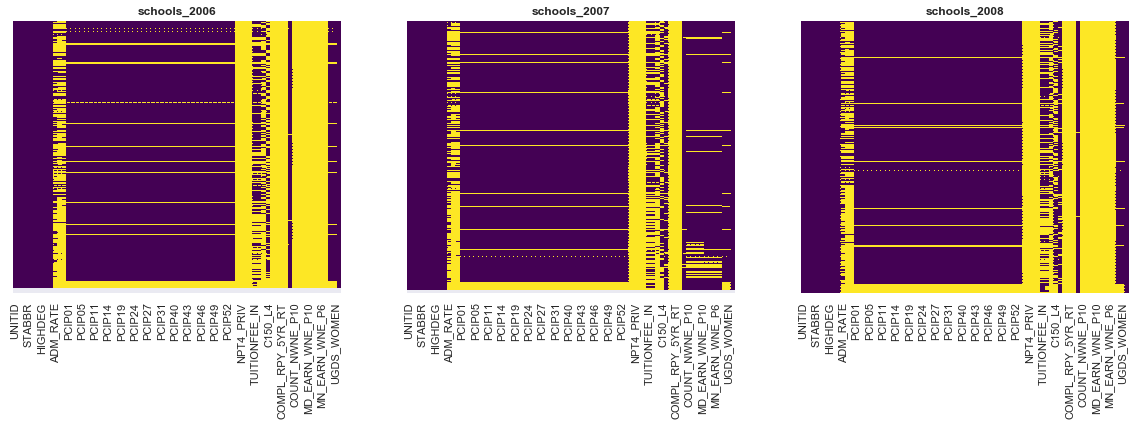

In [7]:
# Heatmap of missing values in each dataframe. Yellow signifies missing values. The labels are inaccurate and are not 
# to scale which is fine; we just want to get a feel for the missing data anyways.

'''
for i, col in enumerate(data):
    plt.figure(i)
    sns.heatmap(data[col].isnull(), yticklabels=False, cbar=False, cmap= 'viridis')
    plt.title(col)
'''

# Preview

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(20,5))
sns.heatmap(data['schools_2006'].isnull(), yticklabels=False, cbar=False, cmap='viridis',ax=ax1)
sns.heatmap(data['schools_2007'].isnull(), yticklabels=False, cbar=False, cmap='viridis',ax=ax2)
sns.heatmap(data['schools_2008'].isnull(), yticklabels=False, cbar=False, cmap='viridis',ax=ax3)
ax1.set_title('schools_2006',weight='bold',fontsize='large')
ax2.set_title('schools_2007',weight='bold',fontsize='large')
ax3.set_title('schools_2008',weight='bold',fontsize='large')

In [8]:
# Let's go through each column and check its title, data type, and proportion of missing values.  

'''
for df in data:
    for col in fields:
        print("Dataframe Name: ", df) # dataframe name
        print("\t", "Column Name: ", col) # column name
        print("\t", "\t","Column data type: ", data[df][col].dtype) # get data type of column
        print("\t", "\t","Proportion of missing values: ", (((data[df][col]).isna().sum())/len(data[df][col]))*100, "\n") # Proportion of NULL values
'''

# Preview

for col in fields:
    print("Dataframe Name: ", 'schools_2006') # dataframe name
    print("\t", "Column Name: ", col) # column name
    print("\t", "\t","Column data type: ", data['schools_2006'][col].dtype) # get data type of column
    print("\t", "\t","Proportion of missing values: ", (((data['schools_2006'][col]).isna().sum())/len(data['schools_2006'][col]))*100, "\n") # Proportion of NULL values

Dataframe Name:  schools_2006
	 Column Name:  UNITID
	 	 Column data type:  int64
	 	 Proportion of missing values:  0.0 

Dataframe Name:  schools_2006
	 Column Name:  INSTNM
	 	 Column data type:  object
	 	 Proportion of missing values:  0.0 

Dataframe Name:  schools_2006
	 Column Name:  CITY
	 	 Column data type:  object
	 	 Proportion of missing values:  0.0 

Dataframe Name:  schools_2006
	 Column Name:  STABBR
	 	 Column data type:  object
	 	 Proportion of missing values:  0.0 

Dataframe Name:  schools_2006
	 Column Name:  ZIP
	 	 Column data type:  object
	 	 Proportion of missing values:  0.0 

Dataframe Name:  schools_2006
	 Column Name:  UGDS_MEN
	 	 Column data type:  float64
	 	 Proportion of missing values:  7.169976635514019 

Dataframe Name:  schools_2006
	 Column Name:  UGDS_WOMEN
	 	 Column data type:  float64
	 	 Proportion of missing values:  7.169976635514019 

Dataframe Name:  schools_2006
	 Column Name:  PREDDEG
	 	 Column data type:  int64
	 	 Proportion of m

In [9]:
# Individual changes to dataframes


# Replacing missing values with correct values in 'CONTROL' of 'schools_2008' dataframe.
not_priv = [17296301,17320301,22797901,22797902 ]
control_miss = data['schools_2008'][data['schools_2008']['CONTROL'].isnull()]['UNITID']
control_miss = [val for val in control_miss]
priv = np.setdiff1d(control_miss,not_priv)

for idnum in priv:
    data['schools_2008'].loc[data['schools_2008'].UNITID == idnum, 'CONTROL'] = 3
for idnum in not_priv:
    data['schools_2008'].loc[data['schools_2008'].UNITID == idnum, 'CONTROL'] = 1
    
data['schools_2008']['CONTROL'] = data['schools_2008']['CONTROL'].astype(int)

In [10]:
# Replacing missing values with correct values in 'REGION' of 'schools_2011' dataframe.
data['schools_2011'].loc[data['schools_2011'].UNITID == 45712901, 'REGION'] = 5
data['schools_2011']['REGION'] = data['schools_2011']['REGION'].astype(int)

In [11]:
# Cleaning the dataframes

for df in data:
    
    # adding a 'year' column
    data[df]['Year'] = pd.to_numeric(df[8:13])
    
    # remapping values in 'PREDDEG'; Predominant undergraduate degree awarded
    dic_1 = {0: "Not classified", 1: "Certificate-Degree", 2: "Associate's-Degree", 3: "Bachelor's-Degree", 4: "Graduate-Degree Only"}
    data[df]["PREDDEG"].replace(dic_1, inplace=True)
    data[df]['PREDDEG'] = data[df]['PREDDEG'].astype(object)

    # remapping values in 'HIGHDEG'; Highest degree awarded
    dic_2 = {0: "Non-degree-granting", 1: "Certificate-Degree", 2: "Associate's-Degree", 3: "Bachelor's-Degree", 4: "Graduate-Degree"}
    data[df]["HIGHDEG"].replace(dic_2, inplace=True)
    data[df]['HIGHDEG'] = data[df]['HIGHDEG'].astype(object)
    
    # remapping values in 'CONTROL'; School type: Public, Private nonprofit, Private for-profit
    dic_3 = {1: "Public", 2: "Private nonprofit", 3: "Private for-profit"}
    data[df]["CONTROL"].replace(dic_3, inplace=True)
    
    # remapping values in 'REGION'
    dic_4 = {0: "U.S. Service Schools", 1: "New England", 2: "Mid East", 3: "Great Lakes", 4: "Plains",  5: "Southeast",
            6: "Southwest", 7: "Rocky Mountains", 8: "Far West", 9: "Outlying Areas"}
    data[df]["REGION"].replace(dic_4, inplace=True)
    
    # replacing missing values in 'ADM_RATE' with 999999
    data[df].loc[data[df].ADM_RATE.isnull(), 'ADM_RATE'] = 999999
    
    # replacing missing values in 'SAT_AVG' with 999999
    data[df].loc[data[df].SAT_AVG.isnull(), 'SAT_AVG'] = 999999
    
    # replacing missing values in 'ACTCMMID' with 999999
    data[df].loc[data[df].ACTCMMID.isnull(), 'ACTCMMID'] = 999999
    
    # transforming the "Percentage of degrees awarded in..." columns
    data[df]['Perc_Awarded_Natural_Sciences_Degree'] = data[df]['PCIP01'] + data[df]['PCIP03']
    data[df].loc[data[df].Perc_Awarded_Natural_Sciences_Degree.isnull(), 'Perc_Awarded_Natural_Sciences_Degree'] = 999999
    data[df]['Perc_Awarded_Humanities_Degree'] = data[df]['PCIP05'] + data[df]['PCIP09'] + data[df]['PCIP16'] + data[df]['PCIP23'] + data[df]['PCIP24'] + data[df]['PCIP38'] + data[df]['PCIP39'] + data[df]['PCIP45'] + data[df]['PCIP50'] + data[df]['PCIP54']
    data[df].loc[data[df].Perc_Awarded_Humanities_Degree.isnull(), 'Perc_Awarded_Humanities_Degree'] = 999999
    data[df]['Perc_Awarded_Education_Degree'] = data[df]['PCIP13']
    data[df].loc[data[df].Perc_Awarded_Education_Degree.isnull(), 'Perc_Awarded_Education_Degree'] = 999999
    data[df]['Perc_Awarded_Science_Degree'] = data[df]['PCIP26'] + data[df]['PCIP40']
    data[df].loc[data[df].Perc_Awarded_Science_Degree.isnull(), 'Perc_Awarded_Science_Degree'] = 999999
    data[df]['Perc_Awarded_Mathematics_Degree'] = data[df]['PCIP27']
    data[df].loc[data[df].Perc_Awarded_Mathematics_Degree.isnull(), 'Perc_Awarded_Mathematics_Degree'] = 999999
    data[df]['Perc_Awarded_Engineering_Degree'] = data[df]['PCIP14'] + data[df]['PCIP15'] + data[df]['PCIP29']
    data[df].loc[data[df].Perc_Awarded_Engineering_Degree.isnull(), 'Perc_Awarded_Engineering_Degree'] = 999999
    data[df]['Perc_Awarded_Business_Degree'] = data[df]['PCIP52']
    data[df].loc[data[df].Perc_Awarded_Business_Degree.isnull(), 'Perc_Awarded_Business_Degree'] = 999999
    data[df]['Perc_Awarded_Computer_Science_Degree'] = data[df]['PCIP11']
    data[df].loc[data[df].Perc_Awarded_Computer_Science_Degree.isnull(), 'Perc_Awarded_Computer_Science_Degree'] = 999999
    data[df]['Perc_Awarded_Law_Degree'] = data[df]['PCIP22']
    data[df].loc[data[df].Perc_Awarded_Law_Degree.isnull(), 'Perc_Awarded_Law_Degree'] = 999999
    data[df]['Perc_Awarded_Psychology_Degree'] = data[df]['PCIP42']
    data[df].loc[data[df].Perc_Awarded_Psychology_Degree.isnull(), 'Perc_Awarded_Psychology_Degree'] = 999999
    data[df]['Perc_Awarded_Trade_Degree'] = data[df]['PCIP04'] + data[df]['PCIP10'] + data[df]['PCIP12'] + data[df]['PCIP41'] + data[df]['PCIP43'] + data[df]['PCIP44'] + data[df]['PCIP46'] + data[df]['PCIP47'] + data[df]['PCIP51']
    data[df].loc[data[df].Perc_Awarded_Trade_Degree.isnull(), 'Perc_Awarded_Trade_Degree'] = 999999
    data[df]['Perc_Awarded_Other'] = data[df]['PCIP19'] + data[df]['PCIP25'] + data[df]['PCIP30'] + data[df]['PCIP31'] + data[df]['PCIP48'] + data[df]['PCIP49']
    data[df].loc[data[df].Perc_Awarded_Other.isnull(), 'Perc_Awarded_Other'] = 999999

    data[df].drop(['PCIP01','PCIP03','PCIP04','PCIP05','PCIP09','PCIP10','PCIP11','PCIP12','PCIP13','PCIP14',
                 'PCIP15','PCIP16','PCIP19','PCIP22','PCIP23','PCIP24','PCIP25','PCIP26','PCIP27','PCIP29',
                 'PCIP30','PCIP31','PCIP38','PCIP39','PCIP40','PCIP41','PCIP42','PCIP43','PCIP44','PCIP45',
                 'PCIP46','PCIP47','PCIP48','PCIP49','PCIP50','PCIP51','PCIP52','PCIP54'], axis=1, inplace=True)

    
    # replacing missing values in NPT4_PUB and NPT4_PRIV and combining the columns into one
    data[df].loc[data[df].NPT4_PUB.isnull(), 'NPT4_PUB'] = data[df].loc[data[df].NPT4_PUB.isnull(), 'NPT4_PRIV']
    data[df].loc[data[df].NPT4_PUB.isnull(), 'NPT4_PUB'] = 999999
    data[df].drop('NPT4_PRIV', axis=1, inplace=True)
    data[df].rename(columns = {'NPT4_PUB':'Avg_Net_Price'}, inplace = True)

    # replacing missing values in COSTT4_A and COSTT4_P and combining the columns into one
    data[df].loc[data[df].COSTT4_A.isnull(), 'COSTT4_A'] = data[df].loc[data[df].COSTT4_A.isnull(), 'COSTT4_P']
    data[df].loc[data[df].COSTT4_A.isnull(), 'COSTT4_A'] = 999999
    data[df].drop('COSTT4_P', axis=1, inplace=True)
    data[df].rename(columns = {'COSTT4_A':'Avg_Cost_of_Attendance'}, inplace = True)
    
    # replacing missing values in 'TUITIONFEE_IN' with 999999
    data[df].loc[data[df].TUITIONFEE_IN.isnull(), 'TUITIONFEE_IN'] = 999999
    
     # replacing missing values in 'TUITIONFEE_OUT' with 999999
    data[df].loc[data[df].TUITIONFEE_OUT.isnull(), 'TUITIONFEE_OUT'] = 999999
    
    # replacing missing values in C150_4 and C150_L4 and combining the columns into one
    data[df].loc[data[df].C150_4.isnull(), 'C150_4'] = data[df].loc[data[df].C150_4.isnull(), 'C150_L4']
    data[df].loc[data[df].C150_4.isnull(), 'C150_4'] = 999999
    data[df].drop('C150_L4', axis=1, inplace=True)
    data[df].rename(columns = {'C150_4':'Completion_Rate'}, inplace = True)
    
    # replacing missing values in 'COMPL_RPY_#YR_RT' with 999999
    data[df].loc[data[df].COMPL_RPY_1YR_RT.isnull(), 'COMPL_RPY_1YR_RT'] = 999999
    try:
        data[df].loc[data[df]['COMPL_RPY_1YR_RT'] == 'PrivacySuppressed', 'COMPL_RPY_1YR_RT'] = 999999
    except:
        pass
    finally:
        data[df]['COMPL_RPY_1YR_RT'] = data[df]['COMPL_RPY_1YR_RT'].astype(float)
        
    data[df].loc[data[df].COMPL_RPY_3YR_RT.isnull(), 'COMPL_RPY_3YR_RT'] = 999999
    try:
        data[df].loc[data[df]['COMPL_RPY_3YR_RT'] == 'PrivacySuppressed', 'COMPL_RPY_3YR_RT'] = 999999
    except:
        pass
    data[df]['COMPL_RPY_3YR_RT'] = data[df]['COMPL_RPY_3YR_RT'].astype(float)
    
    data[df].loc[data[df].COMPL_RPY_5YR_RT.isnull(), 'COMPL_RPY_5YR_RT'] = 999999
    try:
        data[df].loc[data[df]['COMPL_RPY_5YR_RT'] == 'PrivacySuppressed', 'COMPL_RPY_5YR_RT'] = 999999
    except:
        pass
    data[df]['COMPL_RPY_5YR_RT'] = data[df]['COMPL_RPY_5YR_RT'].astype(float)

    data[df].loc[data[df].COMPL_RPY_7YR_RT.isnull(), 'COMPL_RPY_7YR_RT'] = 999999
    try:
        data[df].loc[data[df]['COMPL_RPY_7YR_RT'] == 'PrivacySuppressed', 'COMPL_RPY_7YR_RT'] = 999999
    except:
        pass
    data[df]['COMPL_RPY_7YR_RT'] = data[df]['COMPL_RPY_7YR_RT'].astype(float)
    
    # replacing missing values in 'GRAD_DEBT_MDN' with 999999
    try:
        data[df].loc[data[df]['GRAD_DEBT_MDN'] == 'PrivacySuppressed', 'GRAD_DEBT_MDN'] = 999999
    except:
        pass
    data[df].loc[data[df].GRAD_DEBT_MDN.isnull(), 'GRAD_DEBT_MDN'] = 999999
    data[df]['GRAD_DEBT_MDN'] = data[df]['GRAD_DEBT_MDN'].astype(float)
    
    # replacing missing values in 'COUNT_NWNE_P10' with 999999
    try: 
        data[df].loc[data[df]['COUNT_NWNE_P10'] == 'PrivacySuppressed', 'COUNT_NWNE_P10'] = 999999
    except:
        pass
    data[df].loc[data[df].COUNT_NWNE_P10.isnull(), 'COUNT_NWNE_P10'] = 999999
    data[df]['COUNT_NWNE_P10'] = data[df]['COUNT_NWNE_P10'].astype(int)
    
    # replacing missing values in 'COUNT_WNE_P10' with 999999
    try:
        data[df].loc[data[df]['COUNT_WNE_P10'] == 'PrivacySuppressed', 'COUNT_WNE_P10'] = 999999
    except:
        pass
    data[df].loc[data[df].COUNT_WNE_P10.isnull(), 'COUNT_WNE_P10'] = 999999
    data[df]['COUNT_WNE_P10'] = data[df]['COUNT_WNE_P10'].astype(int)
    
    # replacing missing values in 'MN_EARN_WNE_P10' with 999999
    try:
        data[df].loc[data[df]['MN_EARN_WNE_P10'] == 'PrivacySuppressed', 'MN_EARN_WNE_P10'] = 999999
    except:
        pass
    data[df].loc[data[df].MN_EARN_WNE_P10.isnull(), 'MN_EARN_WNE_P10'] = 999999
    data[df]['MN_EARN_WNE_P10'] = data[df]['MN_EARN_WNE_P10'].astype(int)
    
    # replacing missing values in 'MD_EARN_WNE_P10' with 999999
    try:
        data[df].loc[data[df]['MD_EARN_WNE_P10'] == 'PrivacySuppressed', 'MD_EARN_WNE_P10'] = 999999
    except:
        pass
    data[df].loc[data[df].MD_EARN_WNE_P10.isnull(), 'MD_EARN_WNE_P10'] = 999999
    data[df]['MD_EARN_WNE_P10'] = data[df]['MD_EARN_WNE_P10'].astype(int)
    
    # replacing missing values in 'COUNT_NWNE_P6' with 999999
    try:
        data[df].loc[data[df]['COUNT_NWNE_P6'] == 'PrivacySuppressed', 'COUNT_NWNE_P6'] = 999999
    except:
        pass
    data[df].loc[data[df].COUNT_NWNE_P6.isnull(), 'COUNT_NWNE_P6'] = 999999
    data[df]['COUNT_NWNE_P6'] = data[df]['COUNT_NWNE_P6'].astype(int)
    
    # replacing missing values in 'COUNT_WNE_P6' with 999999
    try:
        data[df].loc[data[df]['COUNT_WNE_P6'] == 'PrivacySuppressed', 'COUNT_WNE_P6'] = 999999
    except:
        pass
    data[df].loc[data[df].COUNT_WNE_P6.isnull(), 'COUNT_WNE_P6'] = 999999
    data[df]['COUNT_WNE_P6'] = data[df]['COUNT_WNE_P6'].astype(int)
    
    # replacing missing values in 'MN_EARN_WNE_P6' with 999999
    try:
        data[df].loc[data[df]['MN_EARN_WNE_P6'] == 'PrivacySuppressed', 'MN_EARN_WNE_P6'] = 999999
    except:
        pass
    data[df].loc[data[df].MN_EARN_WNE_P6.isnull(), 'MN_EARN_WNE_P6'] = 999999
    data[df]['MN_EARN_WNE_P6'] = data[df]['MN_EARN_WNE_P6'].astype(int)
    
    # replacing missing values in 'MD_EARN_WNE_P6' with 999999
    try:
        data[df].loc[data[df]['MD_EARN_WNE_P6'] == 'PrivacySuppressed', 'MD_EARN_WNE_P6'] = 999999
    except:
        pass
    data[df].loc[data[df].MD_EARN_WNE_P6.isnull(), 'MD_EARN_WNE_P6'] = 999999
    data[df]['MD_EARN_WNE_P6'] = data[df]['MD_EARN_WNE_P6'].astype(int)
    
    # replacing missing values in 'UGDS_MEN' with 999999
    data[df].loc[data[df].UGDS_MEN.isnull(), 'UGDS_MEN'] = 999999
    
    # replacing missing values in 'UGDS_WOMEN' with 999999
    data[df].loc[data[df].UGDS_WOMEN.isnull(), 'UGDS_WOMEN'] = 999999
    
    # approximating proportion of unemployment amongst graduating studetns who entered college 6 years ago
    data[df]['Perc_Unemployment_6YR'] = data[df]['COUNT_NWNE_P10']/(data[df]['COUNT_NWNE_P10'] + data[df]['COUNT_WNE_P10'])

Text(0.5,1,'schools_2008')

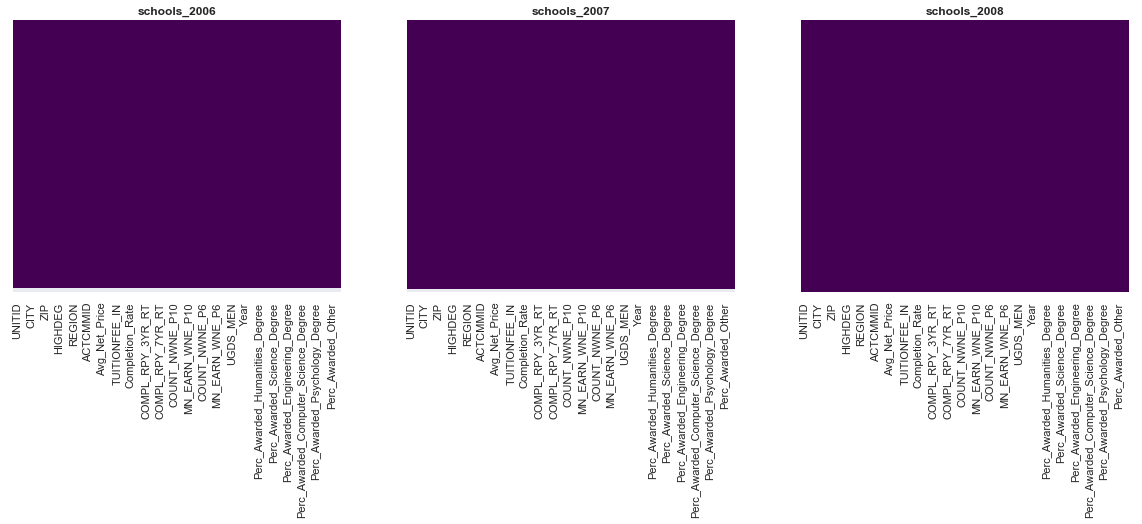

In [12]:
# Let's check if we have handled all of the missing, NULL, values.

'''
for i, col in enumerate(data):
    plt.figure(i)
    sns.heatmap(data[col].isnull(), yticklabels=False, cbar=False, cmap= 'viridis')
    plt.title(col) 
'''  
    
# Preview

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(20,5))
sns.heatmap(data['schools_2006'].isnull(), yticklabels=False, cbar=False, cmap='viridis',ax=ax1)
sns.heatmap(data['schools_2007'].isnull(), yticklabels=False, cbar=False, cmap='viridis',ax=ax2)
sns.heatmap(data['schools_2008'].isnull(), yticklabels=False, cbar=False, cmap='viridis',ax=ax3)
ax1.set_title('schools_2006',weight='bold',fontsize='large')
ax2.set_title('schools_2007',weight='bold',fontsize='large')
ax3.set_title('schools_2008',weight='bold',fontsize='large')

In [13]:
# Taking a look at a dataframe.

data['schools_2014'].head()

,UNITID,INSTNM,CITY,STABBR,ZIP,PREDDEG,HIGHDEG,CONTROL,REGION,ADM_RATE,ACTCMMID,SAT_AVG,Avg_Net_Price,Avg_Cost_of_Attendance,TUITIONFEE_IN,TUITIONFEE_OUT,Completion_Rate,COMPL_RPY_1YR_RT,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,COMPL_RPY_7YR_RT,GRAD_DEBT_MDN,COUNT_NWNE_P10,COUNT_WNE_P10,MN_EARN_WNE_P10,MD_EARN_WNE_P10,COUNT_NWNE_P6,COUNT_WNE_P6,MN_EARN_WNE_P6,MD_EARN_WNE_P6,UGDS_MEN,UGDS_WOMEN,Year,Perc_Awarded_Natural_Sciences_Degree,Perc_Awarded_Humanities_Degree,Perc_Awarded_Education_Degree,Perc_Awarded_Science_Degree,Perc_Awarded_Mathematics_Degree,Perc_Awarded_Engineering_Degree,Perc_Awarded_Business_Degree,Perc_Awarded_Computer_Science_Degree,Perc_Awarded_Law_Degree,Perc_Awarded_Psychology_Degree,Perc_Awarded_Trade_Degree,Perc_Awarded_Other,Perc_Unemployment_6YR
0,100654,Alabama A & M University,Normal,AL,35762,Bachelor's-Degree,Graduate-Degree,Public,Southeast,0.5256,17.0,827.0,15229.0,21475.0,9096.0,16596.0,0.3525,999999.0,0.392265,0.474035,0.673381,33775.0,212,1784,35500,31000,94,1304,28400,25200,0.4831,0.5169,2014,0.0615,0.1272,0.1123,0.1102,0.0169,0.1420,0.1970,0.0275,0.0,0.0487,0.1313,0.0254,0.106212
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Bachelor's-Degree,Graduate-Degree,Public,Southeast,0.8569,24.0,1107.0,14789.0,20621.0,7510.0,17062.0,0.5554,999999.0,0.624358,0.699941,0.813084,21500.0,464,3643,48400,41200,241,2727,39400,35100,0.4169,0.5831,2014,0.0000,0.2088,0.0882,0.0950,0.0102,0.0577,0.1837,0.0150,0.0,0.0780,0.2632,0.0000,0.112978
2,100690,Amridge University,Montgomery,AL,36117-3553,Bachelor's-Degree,Graduate-Degree,Private nonprofit,Southeast,999999.0000,999999.0,999999.0,12992.0,16370.0,6900.0,6900.0,0.2222,999999.0,0.573529,0.612245,0.600000,23000.0,54,170,47600,39600,38,155,35400,30700,0.3986,0.6014,2014,0.0000,0.3088,0.0000,0.0000,0.0000,0.0000,0.4265,0.0000,0.0,0.0000,0.0294,0.2353,0.241071
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,Bachelor's-Degree,Graduate-Degree,Public,Southeast,0.8203,27.0,1219.0,18596.0,21107.0,9158.0,21232.0,0.4614,999999.0,0.715152,0.793409,0.834116,23710.0,213,1475,52000,46700,144,1378,40300,36200,0.5733,0.4267,2014,0.0000,0.1315,0.0187,0.1111,0.0140,0.2624,0.1970,0.0271,0.0,0.0271,0.2110,0.0000,0.126185
4,100724,Alabama State University,Montgomery,AL,36104-0271,Bachelor's-Degree,Graduate-Degree,Public,Southeast,0.5326,18.0,851.0,11110.0,18184.0,8720.0,15656.0,0.2632,999999.0,0.339869,0.439914,0.589085,32871.5,244,1832,30600,27700,157,1754,24400,22600,0.3877,0.6123,2014,0.0000,0.1890,0.1267,0.1210,0.0170,0.0000,0.1115,0.0813,0.0,0.0643,0.2608,0.0284,0.117534


schools_2006


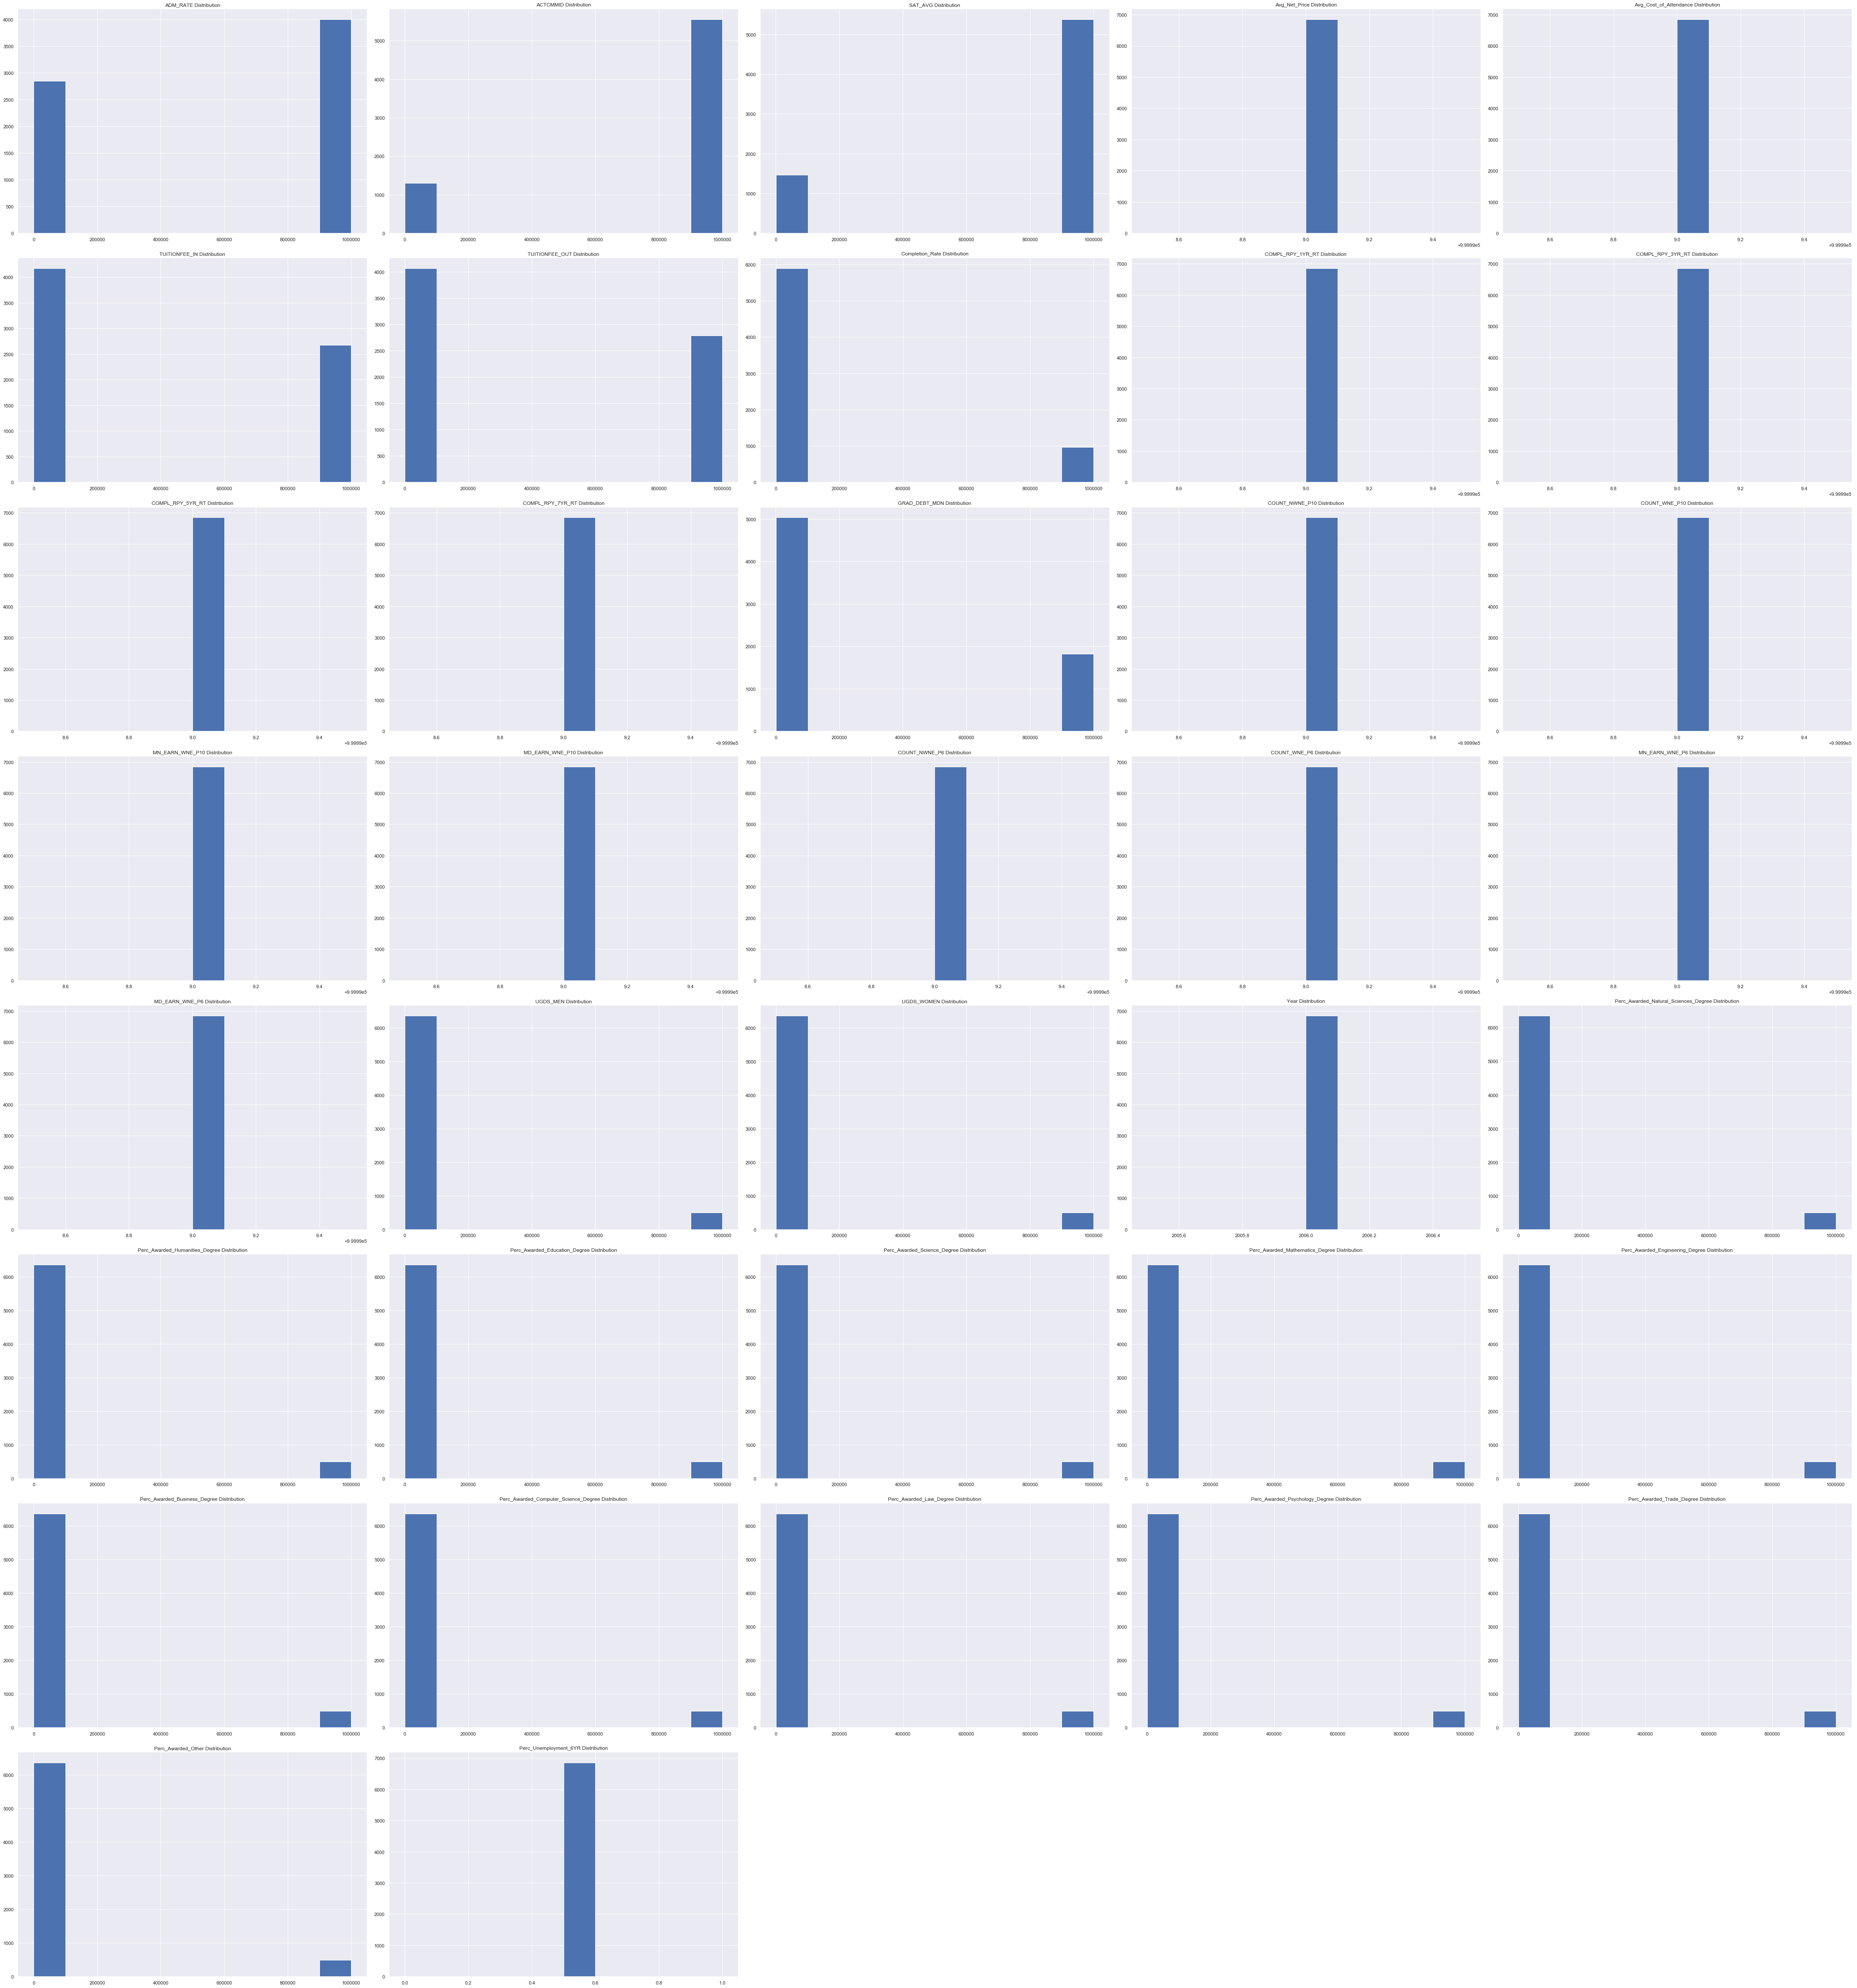

In [14]:
# Let's look at histograms for our data. 

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(60,80))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

'''
for dataframe in data:
    print(dataframe)
    draw_histograms(data[dataframe], data[dataframe].columns[9:], 10, 5)
'''

# Preview

print('schools_2006')
draw_histograms(data['schools_2006'], data['schools_2006'].columns[9:], 10, 5)

It seems like we are missing a lot of data, relatively speaking, for variables such as admission rate, SAT/ACT stats, as well as tuition fees and other educational costs; but, luckily, award percentages, unemployment counts, and earnings are, for the most part, filled with representative data points. This is to say, we *were* missing a lot of data for those variables. We decided to replace missing data with absurdly high values, '999999', in order to easier to differentiate between information we have and information we are missing. During analysis, if even practically possible, we will need to be very careful when analyzing variables that exhibit a lot of missing data as this may skew our perception of what is really going on in the data. Medians will be used as averages throught the analysis in order to offset the skewing afects of the large '999999' placeholders we have put in place.

In [15]:
all_data = pd.concat(data.values(), ignore_index=True)

Let's create two new datasets, using what we have, to explore trends in the data for each state per year and each
degree type per year.
    'state_data' will be composed of one observation for each state and year combination;
    'degree_data' will be composed of one observation for each state and year combination;
We will only be considering colleges that are predominantly 4-year colleges that give out bachelor's degrees.

In [16]:
# Creating state data.

state_data = all_data.loc[all_data['PREDDEG'] == "Bachelor's-Degree",['STABBR', 'Year', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'GRAD_DEBT_MDN', 'COMPL_RPY_1YR_RT',
                       'COMPL_RPY_3YR_RT', 'COMPL_RPY_5YR_RT', 'COMPL_RPY_7YR_RT', 'COUNT_NWNE_P10', 'COUNT_WNE_P10',
                       'MN_EARN_WNE_P10', 'MD_EARN_WNE_P10', 'COUNT_NWNE_P6','COUNT_WNE_P6', 'MN_EARN_WNE_P6', 
                       'MD_EARN_WNE_P6','Perc_Unemployment_6YR','Perc_Awarded_Natural_Sciences_Degree',
                       'Perc_Awarded_Humanities_Degree', 'Perc_Awarded_Education_Degree',
                       'Perc_Awarded_Scicence_Degree', 'Perc_Awarded_Mathematics_Degree',
                       'Perc_Awarded_Engineering_Degree', 'Perc_Awarded_Business_Degree',
                       'Perc_Awarded_Computer_Science_Degree', 'Perc_Awarded_Law_Degree',
                       'Perc_Awarded_Psychology_Degree', 'Perc_Awarded_Trade_Degree',
                       'Perc_Awarded_Other']]

# Calculating median of each quantitative variable.

state_data_median = state_data[state_data.columns.values].groupby(['STABBR', 'Year']).median()  

In [17]:
# Normalizing 'Perc_Awarded' values.

for i in range(0,state_data_median.shape[0]):
    total = state_data_median.iloc[i,16:].sum()
    for j in range(0,12):
        state_data_median.iloc[i,16:][j] = state_data_median.iloc[i,16:][j]/total

In [18]:
state_data_median.to_csv('College_Score_State_Data.csv')

In [19]:
# Creating degree data.

degree_data = all_data.loc[all_data['PREDDEG'] == "Bachelor's-Degree",['Year','COMPL_RPY_5YR_RT', 'COMPL_RPY_7YR_RT', 'GRAD_DEBT_MDN',
       'COUNT_NWNE_P10', 'COUNT_WNE_P10', 'MN_EARN_WNE_P10', 'MD_EARN_WNE_P10',
       'COUNT_NWNE_P6', 'COUNT_WNE_P6', 'MN_EARN_WNE_P6', 'MD_EARN_WNE_P6','Perc_Unemployment_6YR','Perc_Awarded_Natural_Sciences_Degree',
       'Perc_Awarded_Humanities_Degree', 'Perc_Awarded_Education_Degree',
       'Perc_Awarded_Scicence_Degree', 'Perc_Awarded_Mathematics_Degree',
       'Perc_Awarded_Engineering_Degree', 'Perc_Awarded_Business_Degree',
       'Perc_Awarded_Computer_Science_Degree', 'Perc_Awarded_Law_Degree',
       'Perc_Awarded_Psychology_Degree', 'Perc_Awarded_Trade_Degree',
       'Perc_Awarded_Other']]

degree_data['Degree'] = degree_data.iloc[:,14:].idxmax(axis=1)
degree_data['Degree'] = degree_data['Degree'].astype(str)
degree_data['Degree'] = degree_data['Degree'].apply(lambda x: x[13:])

degree_data_median = degree_data.loc[:,['Degree','Year','COMPL_RPY_5YR_RT', 'COMPL_RPY_7YR_RT', 'GRAD_DEBT_MDN',
       'COUNT_NWNE_P10', 'COUNT_WNE_P10', 'MN_EARN_WNE_P10', 'MD_EARN_WNE_P10',
       'COUNT_NWNE_P6', 'COUNT_WNE_P6', 'MN_EARN_WNE_P6', 'MD_EARN_WNE_P6','Perc_Unemployment_6YR']]

degree_data_median['Degree'] = degree_data_median['Degree'].astype(object)
degree_data_median.reset_index(inplace=True)
degree_data_median.drop('index', inplace=True, axis=1)

Many of the financial statistics/variables we are working with are in terms of U.S. dollars. Afer looking through the documentation, there is no indication as to whether or not the financial figures are corrected for changes in the value of currency due to inflation. I am under the impression that the DOE would not commit time and resources to changing historical data every year to reflect changes in the rate of inflation. For this reason, we'll assume that the figures are *not* corrected for inflation. Let's right some code to correct it for us. 

In [20]:
# Simple inflation calculator derived from code written by user TigerhawkT13 on GitHub.

# Input start year (1913-2016) and amount.
def correct_for_inflation(s,v):
    e = 2014
    s = int(s)
    result = float(v)
    if v >= 999999:
        return('{:.1f}'.format(v))
    if e > s:
        for v in inflate_data[s-min_date:e-min_date]:
            result *= v
    else:
        for v in inflate_data[s-min_date:e-min_date:-1]:
            result /= v
    return('{:.1f}'.format(result))

def get_year(rowindex):
    y = degree_data_median.iloc[rowindex, 1]
    return(y)

def get_amount(rowindex,colindex):
    y = degree_data_median.iloc[rowindex, colindex]
    return(float(y))

def rowIndex(row):
    return row.name

degree_data_median['rowIndex'] = degree_data_median.apply(rowIndex, axis=1)

degree_data_median['GRAD_DEBT_MDN'] = degree_data_median['rowIndex'].apply(lambda x: correct_for_inflation(get_year(x),get_amount(x,4)))
degree_data_median['MN_EARN_WNE_P10'] = degree_data_median['rowIndex'].apply(lambda x: correct_for_inflation(get_year(x),get_amount(x,7)))
degree_data_median['MD_EARN_WNE_P10'] = degree_data_median['rowIndex'].apply(lambda x: correct_for_inflation(get_year(x),get_amount(x,8)))
degree_data_median['MN_EARN_WNE_P6'] = degree_data_median['rowIndex'].apply(lambda x: correct_for_inflation(get_year(x),get_amount(x,11)))
degree_data_median['MD_EARN_WNE_P6'] = degree_data_median['rowIndex'].apply(lambda x: correct_for_inflation(get_year(x),get_amount(x,12)))

In [21]:
degree_data_median.drop('rowIndex', inplace = True, axis=1)
cols = ['GRAD_DEBT_MDN','MN_EARN_WNE_P10','MD_EARN_WNE_P10','MN_EARN_WNE_P6','MD_EARN_WNE_P6']
degree_data_median[cols] = degree_data_median[cols].apply(pd.to_numeric)
degree_data_median_count = degree_data_median.groupby(['Degree', 'Year'])[degree_data_median.columns.values].agg(['median', 'count'])
degree_data_median = degree_data_median.groupby(['Degree', 'Year'])[degree_data_median.columns.values].median()
degree_data_median_count.drop('Year',inplace=True,axis=1)
degree_data_median.drop('Year',inplace=True,axis=1)
degree_data_median.reset_index(level=['Degree', 'Year'], inplace = True)

In [22]:
# A table of our final stats based on degree type and year. 
degree_data_median_count

COMPL_RPY_5YR_RT       COMPL_RPY_7YR_RT        \
                                       median count           median count   
Degree                  Year                                                 
Business_Degree         2006    999999.000000   471    999999.000000   471   
                        2007    999999.000000   468    999999.000000   468   
                        2008    999999.000000   471    999999.000000   471   
                        2009    999999.000000   491    999999.000000   491   
                        2010    999999.000000   490    999999.000000   490   
                        2011         0.879204   461    999999.000000   461   
                        2012         0.803030   411    999999.000000   411   
                        2013         0.729358   405         0.883875   405   
                        2014         0.725250   370         0.831153   370   
                        2015         0.748636   373         0.785124   373   
                        2016    999999.000000   381    999999.000000   381   
Computer_Science_Degree 2006    999999.000000    19    999999.000000    19   
                        2007    999999.000000    12    999999.000000    12   
                        2008    999999.000000    10    999999.000000    10   
                        2009    999999.000000     8    999999.000000     8   
                        2010    999999.000000    12    999999.000000    12   
                        2011         0.934430    10    999999.000000    10   
                        2012         0.865217    13    999999.000000    13   
                        2013         0.724879     8         0.895819     8   
                        2014         0.696947    10         0.792683    10   
                        2015         0.692382     9         0.836364     9   
                        2016    999999.000000    15    999999.000000    15   
Education_Degree        2006    999999.000000    85    999999.000000    85   
                        2007    999999.000000    75    999999.000000    75   
                        2008    999999.000000    67    999999.000000    67   
                        2009    999999.000000    53    999999.000000    53   
                        2010    999999.000000    56    999999.000000    56   
                        2011         0.887281    58    999999.000000    58   
                        2012         0.901174    46    999999.000000    46   
                        2013         0.838759    46         0.927805    46   
                        2014         0.819993    34         0.901393    34   
                        2015         0.826339    24         0.873280    24   
                        2016    999999.000000    19    999999.000000    19   
Engineering_Degree      2006    999999.000000    44    999999.000000    44   
                        2007    999999.000000    43    999999.000000    43   
                        2008    999999.000000    43    999999.000000    43   
                        2009    999999.000000    44    999999.000000    44   
                        2010    999999.000000    45    999999.000000    45   
                        2011         0.964953    46    999999.000000    46   
                        2012         0.957831    48    999999.000000    48   
                        2013         0.944134    53         0.963370    53   
                        2014         0.935616    53         0.954278    53   
                        2015         0.914024    59         0.940375    59   
                        2016    999999.000000    59    999999.000000    59   
Humanities_Degree       2006    999999.000000  1087    999999.000000  1087   
                        2007    999999.000000  1089    999999.000000  1089   
                        2008    999999.000000  1084    999999.000000  1084   
                        2009    999999.000000  1070    999999.000000  1070   
                        2010    999999.000000  1077

Lets take a look at how the schools in our original data set are distributed among the data types.

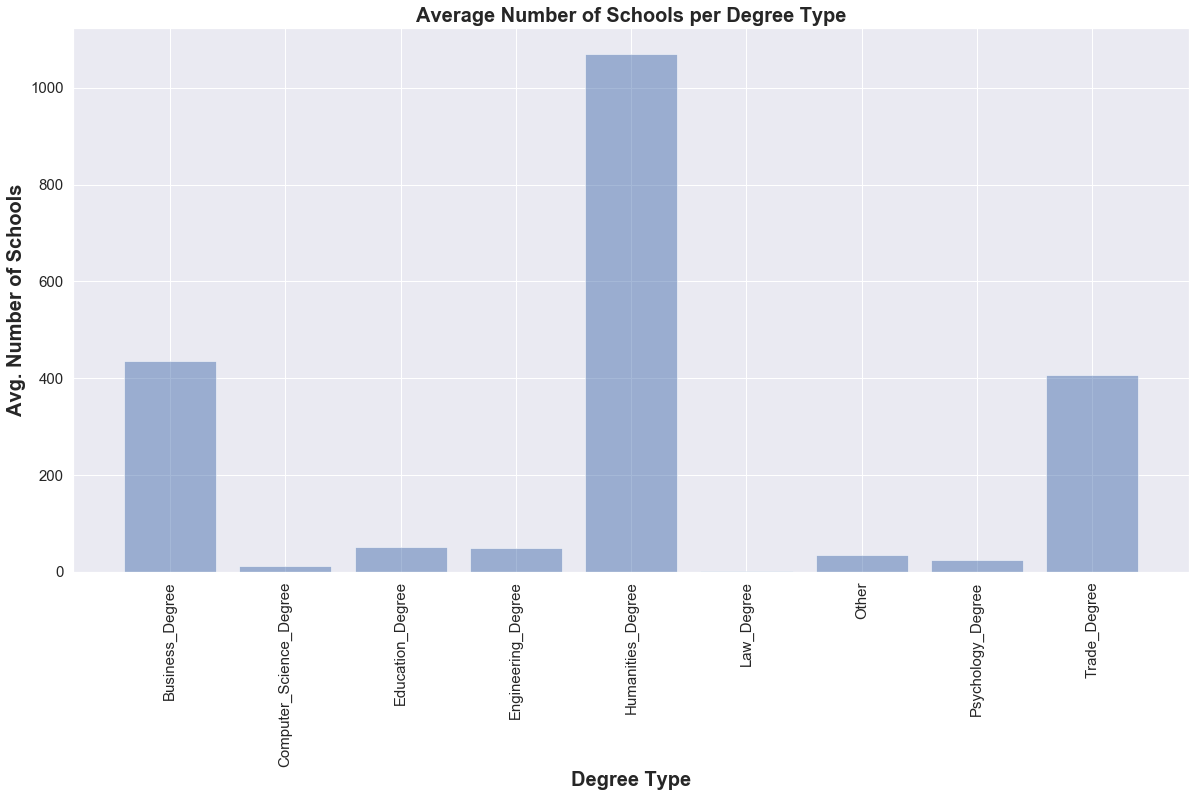

In [23]:
schools_per_degree = pd.DataFrame(degree_data_median_count.iloc[:,1].groupby('Degree').agg('mean'))
schools_per_degree = schools_per_degree.reset_index()

objects = schools_per_degree['Degree']
y_pos = np.arange(len(objects))
performance = schools_per_degree['COMPL_RPY_5YR_RT']['count']

plt.figure(figsize=(20,10))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.yticks(fontsize=15)
plt.xticks(y_pos, objects,rotation='vertical',fontsize=15)
plt.ylabel('Avg. Number of Schools', fontsize=20, weight='bold')
plt.xlabel('Degree Type', fontsize=20, weight='bold')
plt.title('Average Number of Schools per Degree Type', fontsize=20, weight='bold')

plt.show()

Based on how we aggregated the data, it looks like a vast majority of our data points are grouped into the 'Humanities' followed by 'Trade' and 'Business'.

## Visualization & Analysis

Now that the data has been cleaned, we may move on to analyzing our points of interest using the data. Here, we will visualize the data and produce our analysis using Tableau; a very handy and easy-to-use data analysis and visualization tool.

The graphs that follow use the aggregated, median value for each statistic for all 4-year colleges in the correspnding  state. In addition, all the of the graphs, excpet the very last bar graph, represents data for 2014 exclusivley. This  is because 2014 is the latest year for which a majority of the states possess most of measurements/statistics of  interest.

Below is a map of each state along with dots whose size represents the average median amount of debt acquired by a student for all 4-year colleges of each state for the year 2014. 

It seems that, although students from all states acquire about the same amount of debt, there are obvious differences in the median earning amount of these students depending on the state. It seems as if students attending a 4-year  college in the south-east and north-west regions of the U.S. earn, on average, less than those in other parts of the  country. 

It is wise to keep in mind that the students' statistics are based on the geography of the college which they  attended and not their current state of residence. So, the median earnings are for the schools in the states and not the states themselves. 

![title](img/college_score_1.png)

![title](img/college_score_2.png)
![title](img/college_score_3.png)

Below is a map of each state whose color represents the median proportion of students who, 2 years after graduating from a 4-year college, are both unemployed and not attending higher education in 2014. 

It is interesting to see how those students who recieve lower salaries, on average, are also those students who expereince higher rates of unemployement after graduating, on average. Namely, students atending colleges in south-east and north-west regions of the country. Although here, students experience relativley high levels levels of unemployment extending to states lying to the far mid-west and west coast of the country.

![title](img/college_score_999.png)
![title](img/college_score_5.png)
![title](img/college_score_6.png)

Below is a graph of three of the most popular degrees that are awarded to students across the country between the  years 2006 and 2016 with their corresponding, aggragate, median award rates across all states in the U.S.

What is striking is the trend of students leaving the humanities and business fileds in favor of a trade degree. It seems students are entering trade programs in an effort to gain employment as quickly and directly as possible. 

![title](img/college_score_7.png)

Now, lets analyze our degree data using vizualization tools built into packages such as 'matplotlib' and 'seaborn'.

It is important to keep in mind that the following statistics are *rough approximations* for different degree types. The data made readily available by the DOE included the proportion of degrees that were awarded for each subject, for each school, along with the median amount of debt of each school's *entire* graduating student body regardless of degree type. 

A simplification is being made here by viewing graduating classes as being composed, exclusivley, of students of a single degree type; that degree being the one that the school predominantly awards to its students. Data for different schools was aggregated and averaged based on the predominant degree awarded by each institution. 

The number of schools for each degree vary widely as one can see in the 'count' columns of line 'In [22]' of this notebook. The business degree has many more schools than the computer science degree and will, therefore, be accompanied by more reliable visuals and statistics. The fewer schools a degree has, the less reliable results from its analysis will be. Here, the degrees with the most reliability include humanities, business, and trade. Law being the least reliable.

Analyses were restricted between 2006 - 2014 as years 2015 and '16 had so many missing values that any insights gained from their analyses would be inherently misleading. 

In addition, all financial figures have been fixed for inflation and are represented in terms of 2014 dollars.

In [24]:
analyze_grad_debt = degree_data_median.loc[degree_data_median['Year'] != 2016,['Degree','Year','GRAD_DEBT_MDN']]
analyze_six_yr_earn = degree_data_median.loc[(degree_data_median['Year'].between(2011, 2014, inclusive=True)) & (degree_data_median['Degree'] != 'Law_Degree'),['Degree','Year','MN_EARN_WNE_P6', 'MD_EARN_WNE_P6']]
analyze_ten_yr_earn = degree_data_median.loc[(degree_data_median['Year'].between(2011, 2014, inclusive=True)) & (degree_data_median['Degree'] != 'Law_Degree'),['Degree','Year','MN_EARN_WNE_P10', 'MD_EARN_WNE_P10']]
analyze_unemploy_rate = degree_data_median.loc[(degree_data_median['Year'].between(2011, 2014, inclusive=True)) & (degree_data_median['Degree'] != 'Law_Degree'),['Degree','Year','Perc_Unemployment_6YR']]
analyze_unemploy_rate['Year'] = analyze_unemploy_rate['Year'].astype(str)

Text(0,0.5,'Amount of Debt')

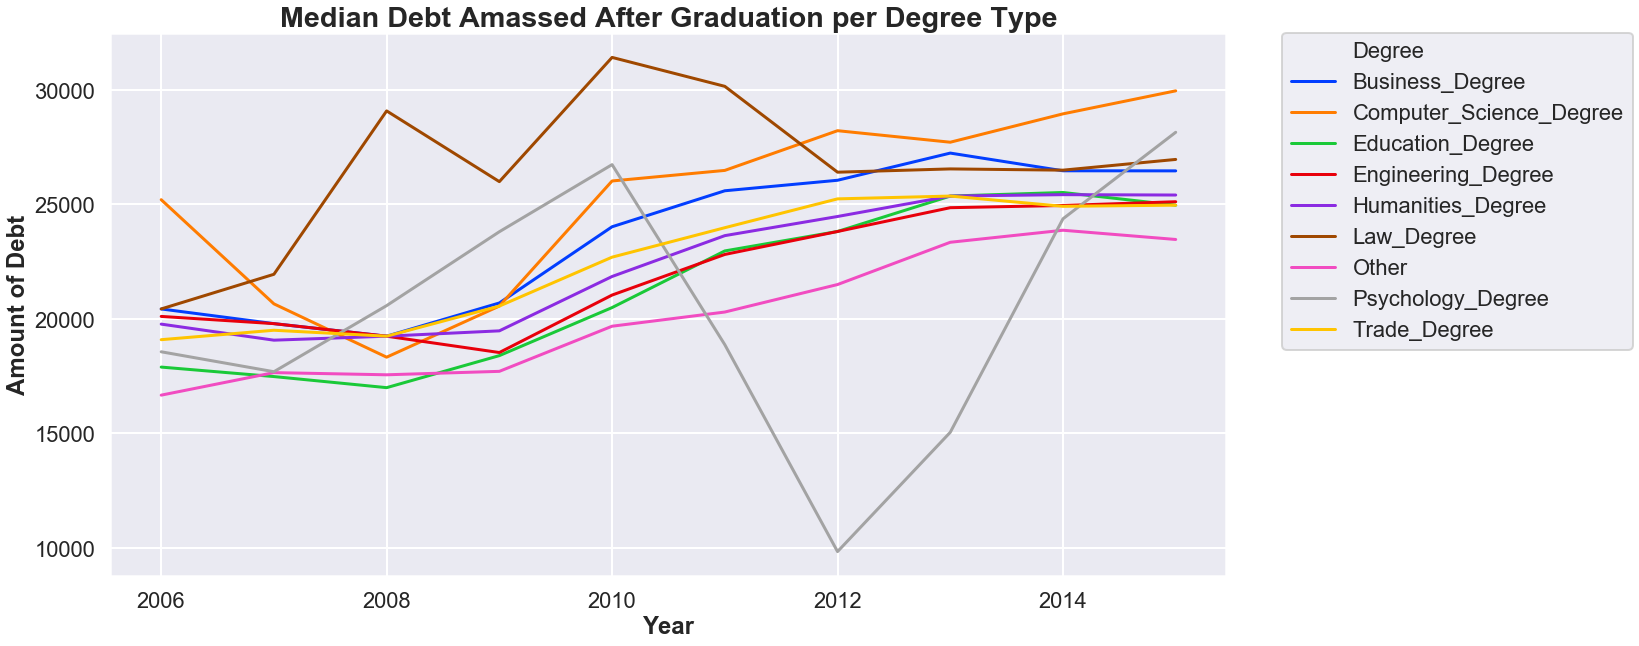

In [25]:
sns.set_context("poster")
plt.figure(figsize=(20,10), linewidth=10)
sns.lineplot(x='Year', y='GRAD_DEBT_MDN',hue='Degree',data=analyze_grad_debt, palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Median Debt Amassed After Graduation per Degree Type', fontsize='large', weight='bold')
plt.xlabel('Year', weight='bold')
plt.ylabel('Amount of Debt', weight='bold')

The above graph shows us the median amount of debt, in dollars, that is amassed by the students categorized by degree type. It seems that, no matter the degree type, there has been a general increase in the average amount of debt amassed by college students over the past 8 years. This may point towards an average increase of about 5,000 dollars in the price of attending college across the U.S. in the past several years. 

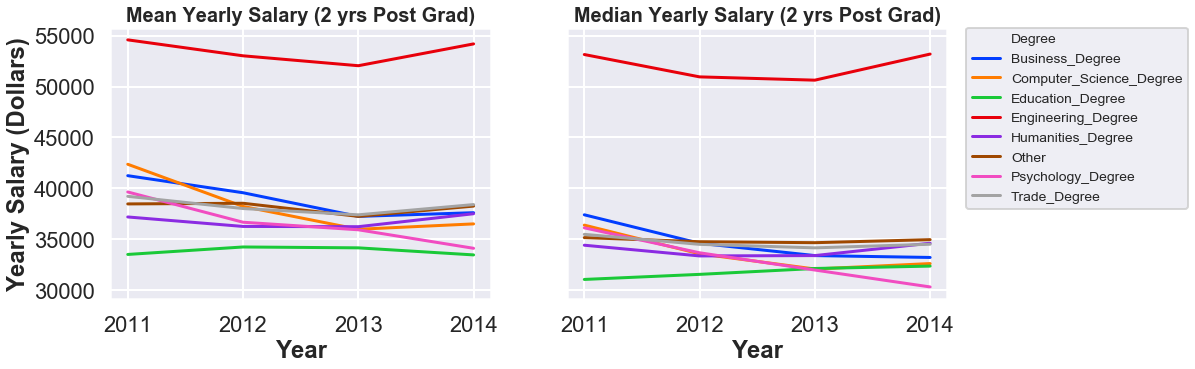

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,5))
sns.lineplot(x=analyze_six_yr_earn['Year'], y=analyze_six_yr_earn['MN_EARN_WNE_P6'], hue=analyze_six_yr_earn['Degree'], ax=ax1, legend=False,palette='bright')
sns.lineplot(x=analyze_six_yr_earn['Year'], y=analyze_six_yr_earn['MD_EARN_WNE_P6'],hue=analyze_six_yr_earn['Degree'], ax=ax2,palette='bright')
ax1.set_title('Mean Yearly Salary (2 yrs Post Grad)',weight='bold',fontsize='small')
ax2.set_title('Median Yearly Salary (2 yrs Post Grad)',weight='bold',fontsize='small')
ax1.set_ylabel('Yearly Salary (Dollars)',weight='bold')
ax1.set_xlabel('Year',weight='bold')
ax2.set_xlabel('Year',weight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='xx-small')

Above, we have the mean and median yearly salaries for each degree. Many of the degre types exhibit a similar average income after 2 years of about 35,000 dollars. Although, those with engineering degrees clearly standout with incomes of over 20,000 dollars more than the other degrees. I find this to be quite suspect because there is no obvious explanation as to why engineering would deviate to drastically from the other degree types. Perhaps, we have too few data points to draw from leading to a large bias in our findings. Yet, the sample sizes for engineering is comparable to 'psychology', 'education', and 'other' which are all nicely grouped together in the same region, near 35,000 dollars. It is also possible that individuals that graduate from engineering courses have readily marketable skills which strongly increase their starting salary potential. We'll keep this finding in mind for further analysis and testing later on.

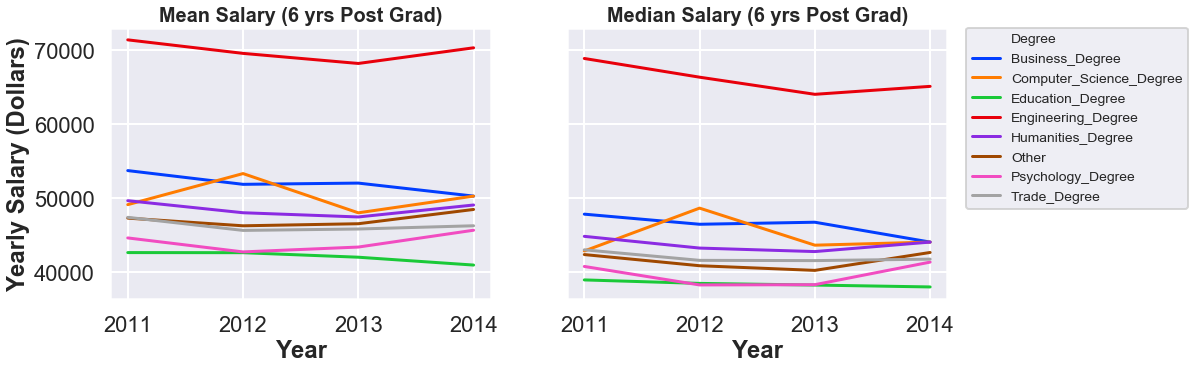

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,5))
sns.lineplot(x=analyze_ten_yr_earn['Year'], y=analyze_ten_yr_earn['MN_EARN_WNE_P10'], hue=analyze_six_yr_earn['Degree'], ax=ax1, legend=False,palette='bright')
sns.lineplot(x=analyze_ten_yr_earn['Year'], y=analyze_ten_yr_earn['MD_EARN_WNE_P10'],hue=analyze_six_yr_earn['Degree'], ax=ax2,palette='bright')
ax1.set_title('Mean Salary (6 yrs Post Grad)',weight='bold',fontsize='small')
ax2.set_title('Median Salary (6 yrs Post Grad)',weight='bold',fontsize='small')
ax1.set_ylabel('Yearly Salary (Dollars)',weight='bold')
ax1.set_xlabel('Year',weight='bold')
ax2.set_xlabel('Year',weight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='xx-small')

Here, we have graphs of yearly salaries similar to those before but with an extended timeframe of 6 years after graduation. We exhibit reasonable findings that we would likely see in the real world. The average salaries for all degrees has been increased to about 45,000 dollars with an increase in the varaince between them. Again, engineering comes out on top with the hightest average yearly salary 6 years after graduation.

Text(0,0.5,'Unemployment Rate')

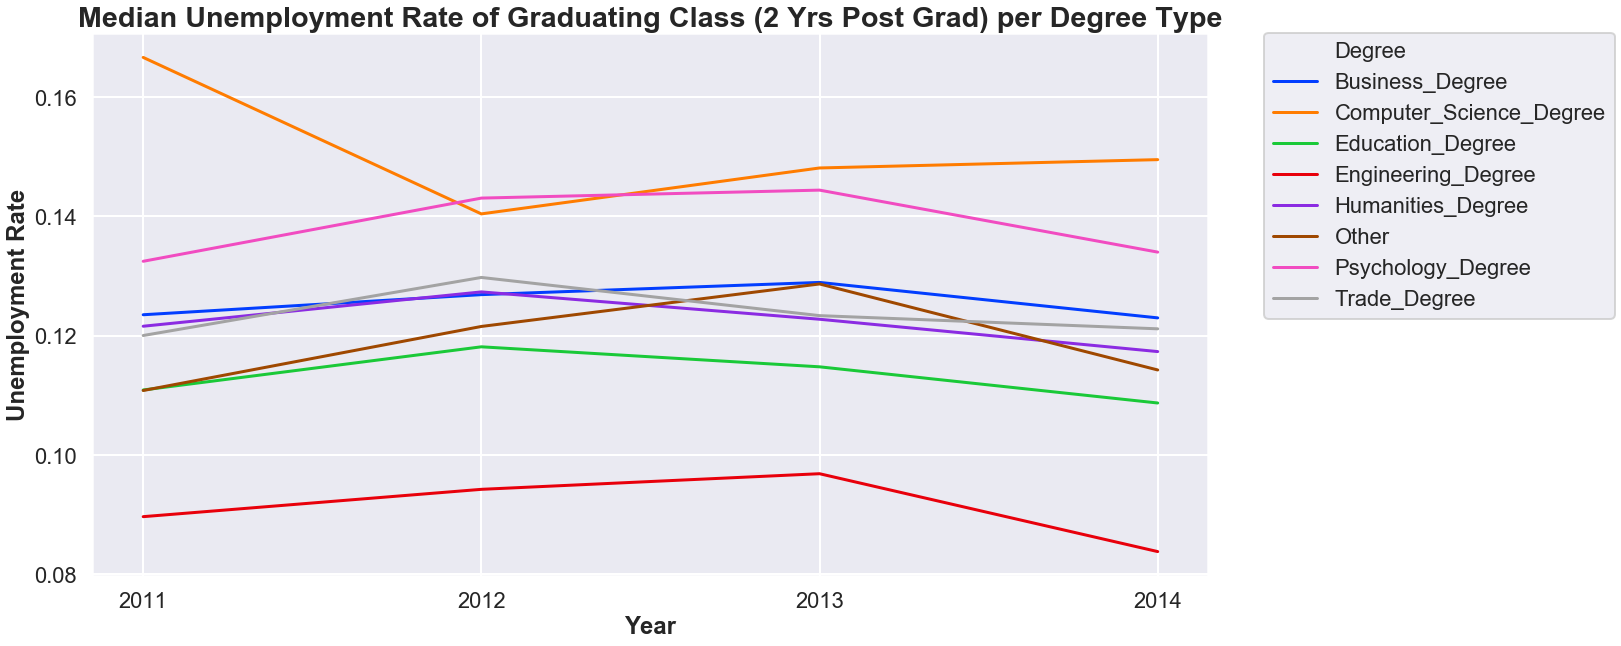

In [28]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Year', y='Perc_Unemployment_6YR',hue='Degree',data=analyze_unemploy_rate, palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Median Unemployment Rate of Graduating Class (2 Yrs Post Grad) per Degree Type', fontsize='large', weight='bold')
plt.xlabel('Year', weight='bold')
plt.ylabel('Unemployment Rate', weight='bold')

Finally, we have average unemployment rates for each degree type between 2011 and 2014. Here, we see much more pronounced varaince amongst the different degree types with engineering degrees possessing the lowest unemployment rate after 2 years of graduating while computer science degrees seem to have the hardest time finding a job. In today's day and age, it is hard to believe that computer science graduates have such a difficult time gaining employment. This can most likely be attributed to the fact that we have very few data points to pull from in this category.

We also see that most of the lines are clustered near a rate of 0.13 including the 'humanities', which has the most data points, therefore making it the most reliable statistic to measure against. It is more likely that all of the degrees are closer to an average unemployment rate of 0.13 than their current rates. 